<a href="https://colab.research.google.com/github/HusseinWaleed1/Energy-Consumption/blob/main/Energy_Consumption_Hussein_Waleed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
sns.set()

In [ ]:
df=pd.read_csv('/content/train_energy_data.csv')
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [ ]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [ ]:
df = pd.get_dummies(df, columns=['Building Type', 'Day of Week'], drop_first=True)

In [ ]:
df.head(10)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False
5,37377,26,32,16.24,4687.67,False,False,True
6,38638,92,14,21.01,5526.83,True,False,True
7,34950,60,18,28.24,4116.32,False,True,False
8,29741,99,44,13.08,5841.65,True,False,False
9,17467,42,36,28.84,3419.13,False,True,False


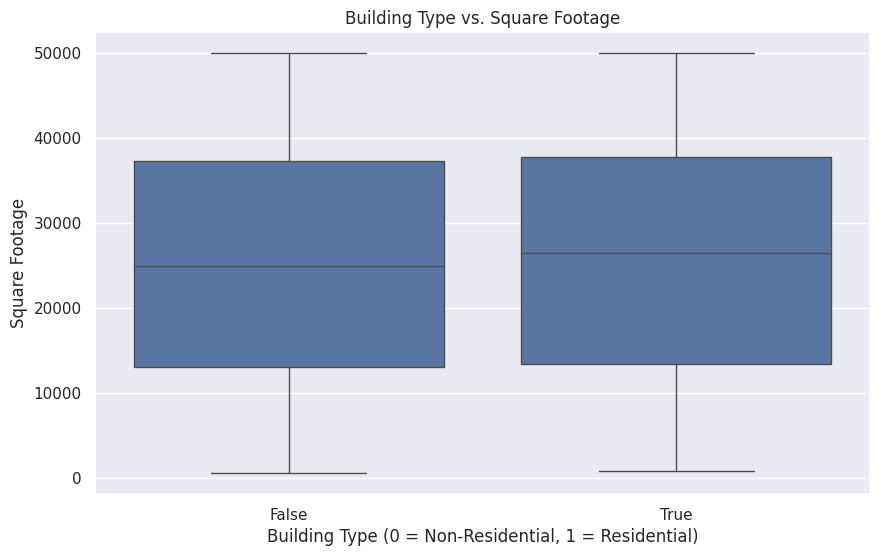

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Building Type_Residential', y='Square Footage', data=df)
plt.xlabel('Building Type (0 = Non-Residential, 1 = Residential)')
plt.ylabel('Square Footage')
plt.title('Building Type vs. Square Footage')
plt.show()



In [ ]:
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data dimensions: {X_train.shape}")
print(f"Test data dimensions: {X_test.shape}")

Training data dimensions: (800, 7)
Test data dimensions: (200, 7)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
Square Footage: 0.0500
Number of Occupants: 10.0000
Appliances Used: 20.0000
Average Temperature: -5.0001
Building Type_Industrial: 500.0000
Building Type_Residential: -500.0003
Day of Week_Weekend: -50.0011
Intercept: 2050.0032


In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Model Performance:
R-squared: 1.0000
Mean Squared Error: 0.0002


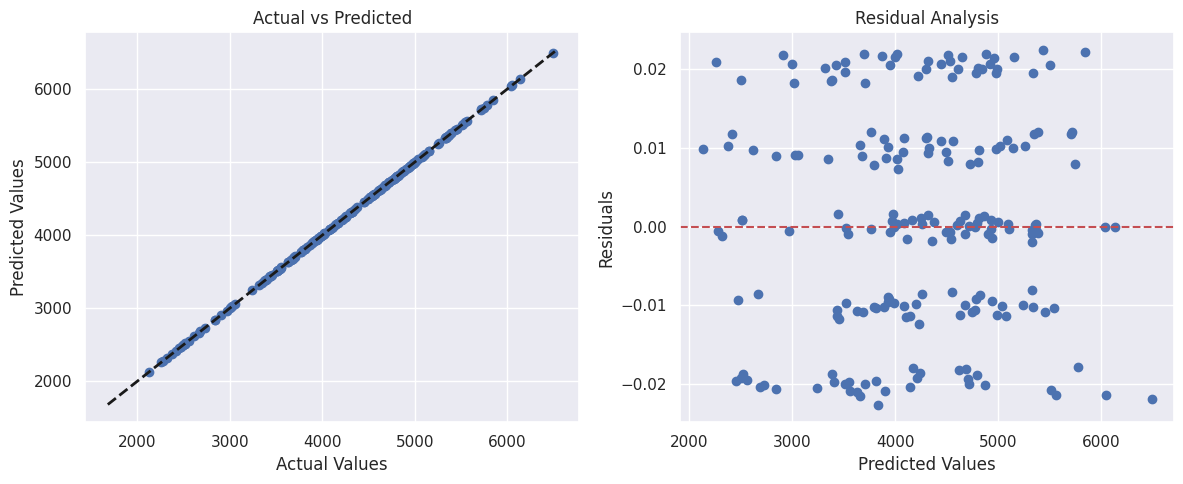

In [ ]:
plt.figure(figsize=(12, 5))

# Actual vs Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Residual plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')

plt.tight_layout()
plt.show()

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)


Feature Importance:
                     Feature  Coefficient
4   Building Type_Industrial   500.000028
2            Appliances Used    20.000015
1        Number of Occupants    10.000003
0             Square Footage     0.050000
3        Average Temperature    -5.000118
6        Day of Week_Weekend   -50.001103
5  Building Type_Residential  -500.000303
